In [4]:
#Gather raw data as Json
import stweet as st

search_tweets_task = st.SearchTweetsTask(all_words = 'omnibus law')
output_jl_tweets = st.JsonLineFileRawOutput('output_raw_search_tweets.jl')
output_jl_users = st.JsonLineFileRawOutput ('output_raw_search_users.jl')

output_print = st.PrintRawOutput ()

st.TweetSearchRunner(search_tweets_task=search_tweets_task,tweet_raw_data_outputs=[output_print, output_jl_tweets], user_raw_data_outputs=[output_print, output_jl_users]).run()

{"object_type": "TweetRaw", "download_datetime": "2023-04-06T08:07:10.406526+07:00", "raw_value": {"created_at": "Fri Mar 31 11:35:25 +0000 2023", "id": 1641766140732145664, "id_str": "1641766140732145664", "full_text": "Sebelum Omnibus Law disahkan, Rezim Jokowi-Ma\u2019aruf telah mempersiapkan alat kekerasan maupun hegemoni untuk menindas perjuangan kelas buruh dan rakyat yang menolaknya serta membenarkan penindasan tersebut.\n\n(R)ezim sebenarnya sudah mempersiapkan dari jauh-jauh hari segala langkah https://t.co/HENS25AJkI", "truncated": false, "display_text_range": [0, 280], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 1641766138349764608, "id_str": "1641766138349764608", "indices": [281, 304], "media_url": "http://pbs.twimg.com/media/Fsi5mriaQAAvU8B.jpg", "media_url_https": "https://pbs.twimg.com/media/Fsi5mriaQAAvU8B.jpg", "url": "https://t.co/HENS25AJkI", "display_url": "pic.twitter.com/HENS25AJkI", "expanded_url": "https://twitt

SearchTweetsResult(downloaded_count=160)

In [5]:
#Transform format to dataframe
import pandas as pd

tweet = pd.read_json('output_raw_search_tweets.jl', lines=True)

tweet.head()

,object_type,download_datetime,raw_value
0,TweetRaw,2023-04-06T08:07:10.406526+07:00,{'created_at': 'Fri Mar 31 11:35:25 +0000 2023...
1,TweetRaw,2023-04-06T08:07:10.406526+07:00,{'created_at': 'Tue Apr 04 05:00:39 +0000 2023...
2,TweetRaw,2023-04-06T08:07:10.406526+07:00,{'created_at': 'Thu Mar 30 03:06:18 +0000 2023...
3,TweetRaw,2023-04-06T08:07:10.406526+07:00,{'created_at': 'Sun Apr 02 21:25:49 +0000 2023...
4,TweetRaw,2023-04-06T08:07:10.406526+07:00,{'created_at': 'Tue Apr 04 09:07:16 +0000 2023...


In [6]:
tweet['raw_value'][1]

{'created_at': 'Tue Apr 04 05:00:39 +0000 2023',
 'id': 1643116347570917377,
 'id_str': '1643116347570917377',
 'full_text': 'Gelombang Tolak Omnibus Law UU Ciptaker, Buruh Kembali Geruduk DPR\nhttps://t.co/tWTgCIxNCF',
 'truncated': False,
 'display_text_range': [0, 90],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/tWTgCIxNCF',
    'expanded_url': 'https://www.gelora.co/2023/04/gelombang-tolak-omnibus-law-uu-ciptaker.html',
    'display_url': 'gelora.co/2023/04/gelomb…',
    'indices': [67, 90]}]},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user_id': 3319260420,
 'user_id_str': '3319260420',
 'geo': None,
 'coordinates': None,
 'place': None,
 'contributors': None,
 'is_quote_status': False,
 'retweet_count'

In [7]:
#Normalizing nested JSON data
tweet_rapi = pd.json_normalize(tweet['raw_value'])
tweet_rapi['full_text'].head(10)

0    Sebelum Omnibus Law disahkan, Rezim Jokowi-Ma’...
1    Gelombang Tolak Omnibus Law UU Ciptaker, Buruh...
2    Menyatukan beragam UU dengan background berbed...
3    #partaiburuh konsisten dalam perjuangan menola...
4    TOLAK DAN BATALKAN OMNIBUS LAW !! \n\n4 April ...
5    Tidak harus semua2nya latah ikut RUU metode Om...
6    Trus pemilik modal pengen dapetin fasilitas lb...
7    Publik minta @DPR_RI segera mengesahkan RUU Pe...
8    Gelombang Tolak Omnibus Law UU Ciptaker, Buruh...
9    Cerita panjang perihal Omnibus Law Cipta Kerja...
Name: full_text, dtype: object

In [8]:
tweet_rapi.dtypes

created_at                                        object
id                                                 int64
id_str                                            object
full_text                                         object
truncated                                           bool
                                                  ...   
card.users.552523769.translator_type              object
card.users.552523769.withheld_in_countries        object
card.users.552523769.followed_by                 float64
card.users.552523769.ext.highlightedLabel.ttl    float64
card.users.552523769.require_some_consent         object
Length: 906, dtype: object

In [10]:
tweet_rapi['created_at'].head()

0    Fri Mar 31 11:35:25 +0000 2023
1    Tue Apr 04 05:00:39 +0000 2023
2    Thu Mar 30 03:06:18 +0000 2023
3    Sun Apr 02 21:25:49 +0000 2023
4    Tue Apr 04 09:07:16 +0000 2023
Name: created_at, dtype: object

In [11]:
tweet_rapi['created_at'] = pd.to_datetime(tweet_rapi['created_at'], format = '%a %b %d %H:%M:%S %z %Y') 
#tweet_rapi['created_at'] = pd.to_datetime(tweet_rapi['created_at']) 

tweet_rapi['created_at'].head()

0   2023-03-31 11:35:25+00:00
1   2023-04-04 05:00:39+00:00
2   2023-03-30 03:06:18+00:00
3   2023-04-02 21:25:49+00:00
4   2023-04-04 09:07:16+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [12]:
tweet_rapi['created_at'].describe()

C:\Users\Monica Ratna Dewi\AppData\Local\Temp\ipykernel_11156\3630262451.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_rapi['created_at'].describe()


count                           160
unique                          160
top       2023-03-31 11:35:25+00:00
freq                              1
first     2023-03-27 15:07:23+00:00
last      2023-04-06 00:26:34+00:00
Name: created_at, dtype: object

In [13]:
#save to csv
tweet_rapi[['full_text', 'created_at']].head()

,full_text,created_at
0,"Sebelum Omnibus Law disahkan, Rezim Jokowi-Ma’...",2023-03-31 11:35:25+00:00
1,"Gelombang Tolak Omnibus Law UU Ciptaker, Buruh...",2023-04-04 05:00:39+00:00
2,Menyatukan beragam UU dengan background berbed...,2023-03-30 03:06:18+00:00
3,#partaiburuh konsisten dalam perjuangan menola...,2023-04-02 21:25:49+00:00
4,TOLAK DAN BATALKAN OMNIBUS LAW !! \n\n4 April ...,2023-04-04 09:07:16+00:00


In [14]:
tweet_rapi[['full_text', 'created_at']].to_csv('saved_clean_tweet.csv')

In [15]:
pd.read_csv('saved_clean_tweet.csv', index_col = 0).head()

,full_text,created_at
0,"Sebelum Omnibus Law disahkan, Rezim Jokowi-Ma’...",2023-03-31 11:35:25+00:00
1,"Gelombang Tolak Omnibus Law UU Ciptaker, Buruh...",2023-04-04 05:00:39+00:00
2,Menyatukan beragam UU dengan background berbed...,2023-03-30 03:06:18+00:00
3,#partaiburuh konsisten dalam perjuangan menola...,2023-04-02 21:25:49+00:00
4,TOLAK DAN BATALKAN OMNIBUS LAW !! \n\n4 April ...,2023-04-04 09:07:16+00:00


In [18]:
#Scrapping specific period
search_tweets_task = st.SearchTweetsTask(all_words='omnibus law until:2022-12-01 since:2020-03-01')

output_jl_tweets = st.JsonLineFileRawOutput('output_raw_search_tweets_1month.jl')
output_jl_users = st.JsonLineFileRawOutput('output_raw_search_users1month.jl')

output_print = st.PrintRawOutput()

st.TweetSearchRunner(search_tweets_task=search_tweets_task,tweet_raw_data_outputs=[output_print, output_jl_tweets], user_raw_data_outputs=[output_print, output_jl_users]).run()

{"object_type": "TweetRaw", "download_datetime": "2023-04-06T08:18:35.613460+07:00", "raw_value": {"created_at": "Wed Nov 30 14:57:28 +0000 2022", "id": 1597968058576142336, "id_str": "1597968058576142336", "full_text": "MENGAPA IDI MENENTANG OMNIBUS LAW KESEHATAN?\nhttps://t.co/fdpddMt9Lv", "truncated": false, "display_text_range": [0, 68], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [{"url": "https://t.co/fdpddMt9Lv", "expanded_url": "https://youtu.be/aw1uQv3m0H0", "display_url": "youtu.be/aw1uQv3m0H0", "indices": [45, 68]}]}, "source": "<a href=\"https://mobile.twitter.com\" rel=\"nofollow\">Twitter Web App</a>", "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user_id": 797761417894051840, "user_id_str": "797761417894051840", "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "retweet_count": 4, "

SearchTweetsResult(downloaded_count=91)

In [17]:
tweet_new = pd.read_json('output_raw_search_tweets_1month.jl', lines=True)

tweet_clean = pd.json_normalize(tweet_new.raw_value)
tweet_clean['created_at'] = pd.to_datetime(tweet_clean['created_at']) 

tweet_clean = tweet_clean[['full_text', 'created_at']]

tweet_clean.describe()

C:\Users\Monica Ratna Dewi\AppData\Local\Temp\ipykernel_11156\2860845309.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_clean.describe()


,full_text,created_at
count,97,97
unique,97,97
top,RUU KESEHATAN OMNIBUS LAW JUSTRU BAKAL MEMUDAH...,2023-03-09 06:05:22+00:00
freq,1,1
first,NaN,2023-03-01 00:15:25+00:00
last,NaN,2023-03-14 14:01:00+00:00


In [19]:
search_tweets_task = st.SearchTweetsTask(all_words='omnibus law until:2023-04-06 since:2023-03-02')
output_jl_tweets = st.JsonLineFileRawOutput('output_raw_search_tweets_feb.jl')
output_jl_users = st.JsonLineFileRawOutput('output_raw_search_users_feb.jl')

output_print = st.PrintRawOutput()

st.TweetSearchRunner(search_tweets_task=search_tweets_task,tweet_raw_data_outputs=[output_print, output_jl_tweets], user_raw_data_outputs=[output_print, output_jl_users]).run()

{"object_type": "TweetRaw", "download_datetime": "2023-04-06T08:19:25.758254+07:00", "raw_value": {"created_at": "Fri Mar 31 11:35:25 +0000 2023", "id": 1641766140732145664, "id_str": "1641766140732145664", "full_text": "Sebelum Omnibus Law disahkan, Rezim Jokowi-Ma\u2019aruf telah mempersiapkan alat kekerasan maupun hegemoni untuk menindas perjuangan kelas buruh dan rakyat yang menolaknya serta membenarkan penindasan tersebut.\n\n(R)ezim sebenarnya sudah mempersiapkan dari jauh-jauh hari segala langkah https://t.co/HENS25AJkI", "truncated": false, "display_text_range": [0, 280], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 1641766138349764608, "id_str": "1641766138349764608", "indices": [281, 304], "media_url": "http://pbs.twimg.com/media/Fsi5mriaQAAvU8B.jpg", "media_url_https": "https://pbs.twimg.com/media/Fsi5mriaQAAvU8B.jpg", "url": "https://t.co/HENS25AJkI", "display_url": "pic.twitter.com/HENS25AJkI", "expanded_url": "https://twitt

SearchTweetsResult(downloaded_count=165)

In [20]:
tweet_feb = pd.read_json('output_raw_search_tweets_feb.jl', lines=True)

tweet_clean_feb = pd.json_normalize(tweet_feb.raw_value)
tweet_clean_feb['created_at'] = pd.to_datetime(tweet_clean_feb['created_at']) 

tweet_clean_feb = tweet_clean_feb[['full_text', 'created_at']]

tweet_clean_feb.describe()

C:\Users\Monica Ratna Dewi\AppData\Local\Temp\ipykernel_11156\570628069.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_clean_feb.describe()


,full_text,created_at
count,165,165
unique,165,165
top,"Sebelum Omnibus Law disahkan, Rezim Jokowi-Ma’...",2023-03-31 11:35:25+00:00
freq,1,1
first,NaN,2023-03-27 15:07:23+00:00
last,NaN,2023-04-05 23:13:16+00:00


In [21]:
tweet_join = pd.concat([tweet_clean_feb,tweet_clean])

tweet_join.describe()

C:\Users\Monica Ratna Dewi\AppData\Local\Temp\ipykernel_11156\2577537099.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_join.describe()


,full_text,created_at
count,262,262
unique,262,262
top,"Sebelum Omnibus Law disahkan, Rezim Jokowi-Ma’...",2023-03-31 11:35:25+00:00
freq,1,1
first,NaN,2023-03-01 00:15:25+00:00
last,NaN,2023-04-05 23:13:16+00:00


In [29]:
#tweet_full = pd.concat([tweet_clean_feb,tweet_clean])

#tweet_full.to_csv()

In [30]:
tweet_join.head()

,full_text,created_at,Day
0,"Sebelum Omnibus Law disahkan, Rezim Jokowi-Ma’...",2023-03-31 11:35:25+00:00,Friday
1,"Gelombang Tolak Omnibus Law UU Ciptaker, Buruh...",2023-04-04 05:00:39+00:00,Tuesday
2,Menyatukan beragam UU dengan background berbed...,2023-03-30 03:06:18+00:00,Thursday
3,#partaiburuh konsisten dalam perjuangan menola...,2023-04-02 21:25:49+00:00,Sunday
4,TOLAK DAN BATALKAN OMNIBUS LAW !! \n\n4 April ...,2023-04-04 09:07:16+00:00,Tuesday


In [31]:
tweet_join['created_at'].dt.day_name()

0        Friday
1       Tuesday
2      Thursday
3        Sunday
4       Tuesday
        ...    
92    Wednesday
93     Thursday
94     Thursday
95       Friday
96       Friday
Name: created_at, Length: 262, dtype: object

In [32]:
tweet_join['Day'] = tweet_join['created_at'].dt.day_name()

tweet_join.head()

,full_text,created_at,Day
0,"Sebelum Omnibus Law disahkan, Rezim Jokowi-Ma’...",2023-03-31 11:35:25+00:00,Friday
1,"Gelombang Tolak Omnibus Law UU Ciptaker, Buruh...",2023-04-04 05:00:39+00:00,Tuesday
2,Menyatukan beragam UU dengan background berbed...,2023-03-30 03:06:18+00:00,Thursday
3,#partaiburuh konsisten dalam perjuangan menola...,2023-04-02 21:25:49+00:00,Sunday
4,TOLAK DAN BATALKAN OMNIBUS LAW !! \n\n4 April ...,2023-04-04 09:07:16+00:00,Tuesday


In [33]:
pd.crosstab(index = tweet_join['Day'] , columns = 'count').sort_values(by = 'count', ascending =False)

col_0,count
Day,
Tuesday,58
Thursday,48
Monday,44
Friday,37
Wednesday,31
Sunday,24
Saturday,20


In [35]:
pd.crosstab(index = tweet_join['Day'] , columns = 'count').sort_values(by = 'count', ascending =False)

col_0,count
Day,
Tuesday,58
Thursday,48
Monday,44
Friday,37
Wednesday,31
Sunday,24
Saturday,20


<Axes: xlabel='Day'>

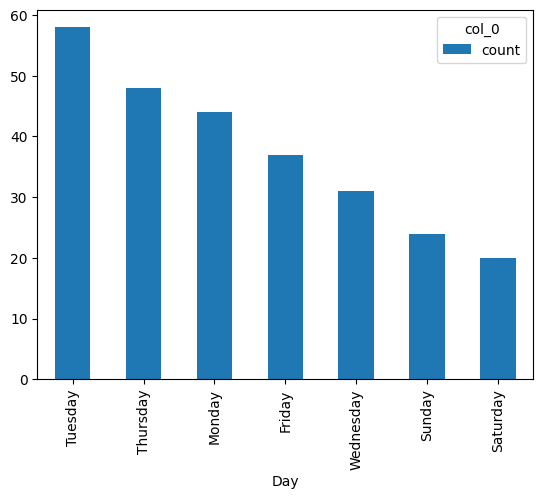

In [40]:
import matplotlib.pyplot as plt
import numpy as np
pd.crosstab(index = tweet_join['Day'] , columns = 'count').sort_values(by = 'count', ascending =False).plot(kind = 'bar')

<Axes: xlabel='date'>

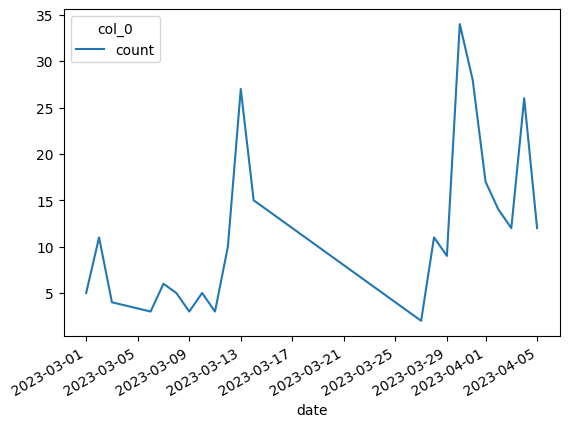

In [41]:
tweet_join['date'] = pd.to_datetime(tweet_join['created_at'].dt.date)

pd.crosstab(index = tweet_join['date'], columns='count').plot()

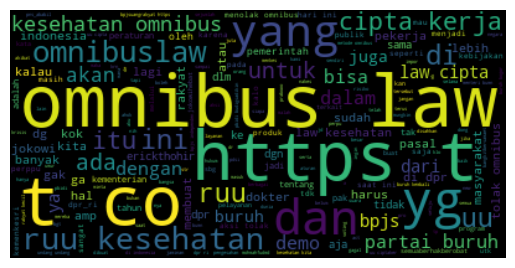

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#filter the df to one candidate, and create a list of responses from them
text = tweet_join['full_text'].tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

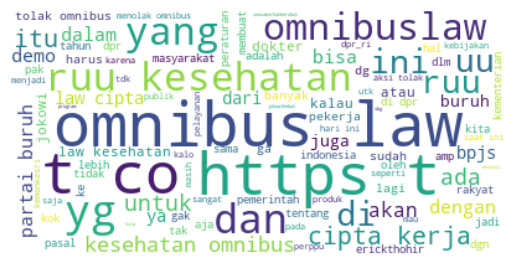

In [47]:
#filter the df to one candidate, and create a list of responses from them
text = tweet_join['full_text'].tolist() 

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()